In [1]:
%matplotlib widget
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
s = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
date = s.query(measurement.date).first()
print(date)

('2010-01-01',)


            prcp
date            
2016-08-23  0.00
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00
...          ...
2017-08-19  0.09
2017-08-20   NaN
2017-08-21  0.56
2017-08-22  0.50
2017-08-23  0.45

[2230 rows x 1 columns]


<Axes: xlabel='Date', ylabel='Inches of Rain'>

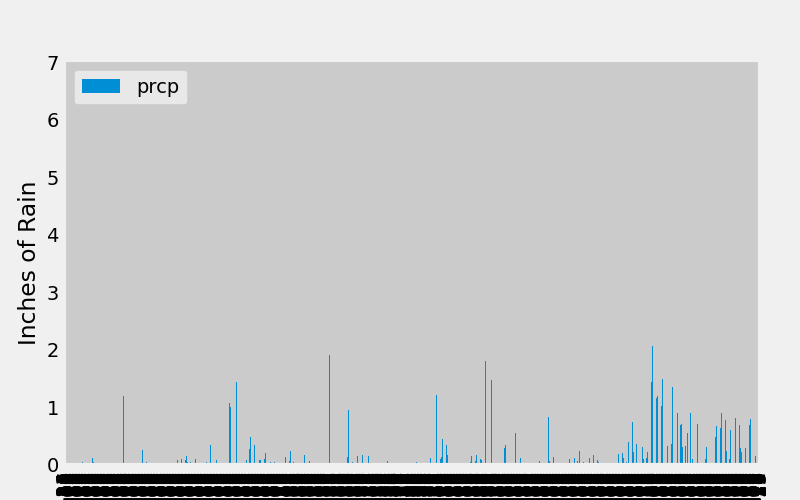

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
recentdate = s.query(measurement.date).order_by(measurement.date.desc()).first()
firstdate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
lastyear = s.query(measurement.date, measurement.prcp).filter(measurement.date >= firstdate).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(lastyear, columns=['date','prcp'])

df.set_index('date', inplace=True)
# Sort the dataframe by date
df.sort_values(by='date')
print(df)
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='bar', rot=90, xlabel='Date', ylabel='Inches of Rain', figsize=(8,5))

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations = s.query(station.id).count()
stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stationscount = s.query(measurement.station, func.count(measurement.station)).\
                        group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stationscount[0]

('USC00519281', 2772)

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mintemp = s.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').first()
maxtemp = s.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').first()
avgtemp = s.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').first()
print(mintemp, maxtemp, avgtemp)

(54.0,) (85.0,) (71.66378066378067,)


Text(0.5, 0, 'Temperature')

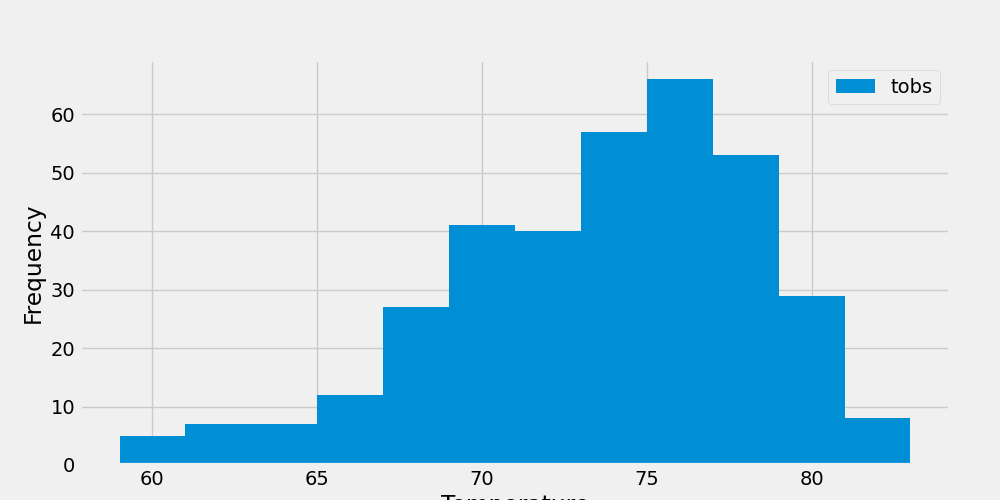

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12station1 = s.query(measurement.tobs).\
                    filter(measurement.date >= firstdate).\
                    filter(measurement.station == 'USC00519281')
df2 = pd.DataFrame(last12station1, columns=['tobs'])

df2.plot.hist(bins=12, figsize=(10,5))
plt.xlabel('Temperature')

# Close Session

In [16]:
# Close Session
s.close()